<a href="https://colab.research.google.com/github/PetraB42/DSpracticum2020/blob/main/Zem%26vek_bullshit_editor_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Stahovac clankov zo casopisu Zem a Vek </h1>

Vyuziva BeautifulSoup (parser web stranok)

Ucila som to hlavne z tutorialu https://realpython.com/beautiful-soup-web-scraper-python/

Dokumentacia BeautifulSoup: https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [ ]:
# !pip3 install requests # v colabe uz je 
import requests

from bs4 import BeautifulSoup # v colabe uz je


Pre zaciatok ziskame linky na clanky v zvolenej kategorii

Zvolila som kategoriu "veda a spolocnost", pretoze mi prisla najviac juicy


In [ ]:
# vyextrahuj linky na clanky z rozcestnikovych stranok

stranok = 5 # pocet hlavnych stranok, na kazdej je 8 clankov

prefix = 'https://zemavek.sk/magazin/veda-a-spolocnost/page/'


links = [] # sem pridu linky na samotne clanky

for i in range(1,stranok+1):
  url = 'https://zemavek.sk/magazin/veda-a-spolocnost/page/' +str(i) +'/'
  page = requests.get(url) #stiahne kod stranky
  soup = BeautifulSoup(page.content, 'html.parser') #parsuje 
  results = soup.find(id = "content") #najdi hlavnu cast stranky
  zoznam_clankov = results.find_all("header") # nazdi kazdy nadpis clanku - vytvori list
  for item in zoznam_clankov: # go deeper
    title_elem = item.find('a') 
    if title_elem == None: # pokial nieco nema hodnotu, kasli na to a chod dalej 
      continue
    link = title_elem["href"] #najdi tag "href"
    links.append(link)

print(links)

['https://zemavek.sk/spolocne-korene-covidoveho-a-klimatickeho-alarmizmu/', 'https://zemavek.sk/psyops-prerastanie-armady-a-medii-prichadza-na-slovensko/', 'https://zemavek.sk/zmocnovaci-zakon-ermachtigungsgesetz-1933/', 'https://zemavek.sk/studia-fn-motol-antigenove-testy-nie-su-spolahlive/', 'https://zemavek.sk/viac-vln-ako-v-oceane/', 'https://zemavek.sk/mlady-brazilsky-doktor-zomrel-pri-testovani-oxfordskej-vakciny-astra-zeneca/', 'https://zemavek.sk/studia-cdc-85-pozitivnych-na-covid-19-nosili-rusko-sustavne-4-pozitivnych-nikdy/', 'https://zemavek.sk/39432-2/', 'https://zemavek.sk/kam-vedu-stopy-pedofilnej-afery-wayfairgate/', 'https://zemavek.sk/zvysene-riziko-nechripkovych-respiracnych-virusovych-infekcii-z-vakciny-proti-chripke/', 'https://zemavek.sk/nova-pristavba-pyramidy-moci-elektronicky-koncentrak/', 'https://zemavek.sk/medicinsko-ekonomicke-zdovodnenie-podstatne-rychlejsieho-ukoncenia-virusovej-karanteny-v-sr/', 'https://zemavek.sk/imperium-v-imperiach/', 'https://zemavek

V druhom kroku ziskame samotne clanky: ich nadpisy a texty. 

Tie som zatial ulozila do dictionary vo fome { "nazov clanku": ["odstavec1","odstavec2"...]}. To je asi dost debilna struktura, ale zatial neviem, ako sa to bude loadovat do tej neuronovej siete a toto ma tu vyhodu, ze to zachova odstavcovu strukturu povodneho textu. 

In [ ]:
# funkcia na rozdelenie textu a odstránenie obsahu za hľadaným výrazom
def erase_after(string, sub_str): 
  if (string.find(sub_str) == -1):
    return string
  else:
    string1 = string.split(sub_str)
    string2 = string1[0]
    return string2

In [ ]:
# vyextrahuj nadpisy a texty clankov
clanky = {}

for link in links:
  stranka = requests.get(link)
  soup = BeautifulSoup(stranka.content)
  nadpis = soup.find("h1").text

  clanok = soup.find(class_="entry-content clearfix")
  telo = clanok.find_all('p') # list vsetkcyh odstavcov v tele clanku

  odstavce = []
  
  for odstavec in telo:
    text = odstavec.text
    text = text.replace("\xa0", " ") # ostrani skaredy non-breaking space
    text = erase_after(text,"Autor:") # pokus o odstránenie info z konca článku
    text = erase_after(text,"Vyhlásenie:") 
    text = erase_after(text,"Zdroje:")
    text = erase_after(text,"Zdroj:")
    text = erase_after(text,"Pramene:")
    text = erase_after(text,"\nAk vás článok")
    odstavce.append(text)
  print(odstavce)
  

  clanky[nadpis] = odstavce

['Koronavírusová agenda v spojení s klimatickým alarmizmom sa využívajú na kontrolu más a vykonanie rýchlych, hlbokých spoločenských zmien, zbavujúc nás práv a slobôd v záujme presadenia veľkého resetu. Obe agendy majú spoločné viac, než by ste si mysleli. Dokonca sa nájdu aj paralely s pádmi budov Svetového obchodného centra v New Yorku.', 'Začiatkom augusta Bill Gates na svojej webovej stránke uverejnil esej s názvom Covid-19 je hrozný. Klimatická zmena môže byť horšia s argumentáciou, že lekcia, ktorú nám dáva pandémia koronavírusu, je, že ľudia budú musieť obetovať ešte viac, aby zachránili svet pred globálnym otepľovaním. Dňa 24. augusta Tucker Carlson na Fox News v programe Tucker: Kedy získame Ameriku späť? upozornil, že podľa generálneho riaditeľa WHO Tedrosa Adhanoma je koronavírus o globálnom otepľovaní. „Nemôžeme sa vrátiť späť k starému spôsobu fungovania… Pandémia Covid-19 dala nový impulz potrebe urýchliť úsilie odpovedať na klimatickú zmenu,“ vyhlásil šéf organizácie, kt

In [ ]:
# uloz data na drive

from google.colab import drive
drive.mount('/content/gdrive')


# uloz do textaku, aby to readable ludmi
file_address = '/content/gdrive/My Drive/clanky_zemavek.txt'

try: 
    subor = open(file_address, 'wt') 
    subor.write(str(clanky)) 
    subor.close() 
    print('Uspesne zapsano!')
  
except: 
    print("Unable to write to file")

Mounted at /content/gdrive
Uspesne zapsano!


## **Train NN to produce text**

zdroje: 
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb

https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/

https://stackabuse.com/python-for-nlp-deep-learning-text-generation-with-keras/

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.layers.recurrent import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#link k zdrojovému súboru - automaticky v textovom formáte
#data = open('/content/gdrive/My Drive/clanky_zemavek.txt').read()

# prevedenie clánkov na text + odstránenie výzvy na podporu z konca článku
text = str(clanky) 
text = text.replace("['", "")
text = text.replace("]", "")
text = text.replace("{'", "")
text = text.replace("'}", "")
text = text.replace("„", "" )
text = text.replace("“", "" )

text


"Spoločné korene covidového a klimatického alarmizmu': Koronavírusová agenda v spojení s klimatickým alarmizmom sa využívajú na kontrolu más a vykonanie rýchlych, hlbokých spoločenských zmien, zbavujúc nás práv a slobôd v záujme presadenia veľkého resetu. Obe agendy majú spoločné viac, než by ste si mysleli. Dokonca sa nájdu aj paralely s pádmi budov Svetového obchodného centra v New Yorku.', 'Začiatkom augusta Bill Gates na svojej webovej stránke uverejnil esej s názvom Covid-19 je hrozný. Klimatická zmena môže byť horšia s argumentáciou, že lekcia, ktorú nám dáva pandémia koronavírusu, je, že ľudia budú musieť obetovať ešte viac, aby zachránili svet pred globálnym otepľovaním. Dňa 24. augusta Tucker Carlson na Fox News v programe Tucker: Kedy získame Ameriku späť? upozornil, že podľa generálneho riaditeľa WHO Tedrosa Adhanoma je koronavírus o globálnom otepľovaní. Nemôžeme sa vrátiť späť k starému spôsobu fungovania… Pandémia Covid-19 dala nový impulz potrebe urýchliť úsilie odpoveda

split string into sequences

In [ ]:
nltk.download('punkt')

# potrebujeme českú verziu tokeizeru na správnu interpretáciu interpunkcie(slovensk som nenašla)
czech_tokenizer = nltk.data.load('tokenizers/punkt/PY3/czech.pickle')

by_sentence = nltk.tokenize.sent_tokenize(text)
by_sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


["Spoločné korene covidového a klimatického alarmizmu': Koronavírusová agenda v spojení s klimatickým alarmizmom sa využívajú na kontrolu más a vykonanie rýchlych, hlbokých spoločenských zmien, zbavujúc nás práv a slobôd v záujme presadenia veľkého resetu.",
 'Obe agendy majú spoločné viac, než by ste si mysleli.',
 'Dokonca sa nájdu aj paralely s pádmi budov Svetového obchodného centra v New Yorku.',
 "', 'Začiatkom augusta Bill Gates na svojej webovej stránke uverejnil esej s názvom Covid-19 je hrozný.",
 'Klimatická zmena môže byť horšia s argumentáciou, že lekcia, ktorú nám dáva pandémia koronavírusu, je, že ľudia budú musieť obetovať ešte viac, aby zachránili svet pred globálnym otepľovaním.',
 'Dňa 24. augusta Tucker Carlson na Fox News v programe Tucker: Kedy získame Ameriku späť?',
 'upozornil, že podľa generálneho riaditeľa WHO Tedrosa Adhanoma je koronavírus o globálnom otepľovaní.',
 'Nemôžeme sa vrátiť späť k starému spôsobu fungovania… Pandémia Covid-19 dala nový impulz po

In [ ]:
print(len(clanky))
print(len(by_sentence))

40
1275


Tokenize text

In [ ]:
# prevedenie článkov na zoznam indexovaných slov
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(by_sentence)
word_index = tokenizer.word_index
print("%s unique tokens." %(len(word_index)+1))
print(word_index)

vocab_size = len(word_index.keys())+1

9372 unique tokens.
{'<OOV>': 1, 'a': 2, 'v': 3, 'na': 4, "'": 5, 'sa': 6, 'že': 7, 'je': 8, 'z': 9, 'o': 10, 's': 11, 'to': 12, 'aj': 13, 'ako': 14, 'do': 15, "''": 16, 'k': 17, 'alebo': 18, '–': 19, 'pre': 20, 'ktoré': 21, 'za': 22, 'by': 23, 'ale': 24, 'si': 25, 'sú': 26, 'aby': 27, 'už': 28, 'čo': 29, 'nie': 30, 'od': 31, 'ľudí': 32, 'ich': 33, 'bude': 34, '19': 35, 'po': 36, 'covid': 37, 'ktorí': 38, 'vo': 39, 'ktorá': 40, 'roku': 41, 'pri': 42, 'keď': 43, 'pred': 44, "2020'": 45, 'tom': 46, 'len': 47, 'až': 48, 'podľa': 49, 'proti': 50, 'boli': 51, 'ak': 52, 'koronavírusu': 53, 'ešte': 54, '2': 55, 'ktorý': 56, 'se': 57, 'ste': 58, 'či': 59, 'viac': 60, 'bol': 61, 'sme': 62, 'byť': 63, 'i': 64, 'má': 65, 'rokov': 66, 'vakcíny': 67, 'jeho': 68, 'môže': 69, '1': 70, 'tak': 71, 'tejto': 72, 'kde': 73, 'ani': 74, 'preto': 75, 'ju': 76, 'so': 77, 'tento': 78, 'ľudia': 79, '10': 80, 'vás': 81, 'bolo': 82, 'usa': 83, '3': 84, 'pacientov': 85, 'vakcína': 86, 'spoločnosti': 87, 'miliónov'

prepare training library and model

In [ ]:
sentences = []

for line in by_sentence:
  token_list = tokenizer.texts_to_sequences([line])[0] # prevedenie viet na zoznam tokenov
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    sentences.append(n_gram_sequence)


In [ ]:
# prevedenie viet na vektory s rovnakou dĺžkou
embedding_dim = max([len(x) for x in sentences])
pad = pad_sequences(sentences, maxlen = embedding_dim, padding= "pre")
print(embedding_dim)

106


In [ ]:
# priprava prediktorv a značiek pre model
x, labs = pad[:,:-1], pad[:,-1]

y = to_categorical(labs, num_classes=vocab_size)

print(x.shape)
print(y.shape) 

(21656, 105)
(21656, 9372)


In [ ]:
#príprava modelu

from keras.layers import LSTM


model = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size, 200, input_length = embedding_dim),
     tf.keras.layers.Bidirectional(LSTM(180, return_sequences= True)),
     tf.keras.layers.Bidirectional(LSTM(100, return_sequences= True)),
     tf.keras.layers.Bidirectional(LSTM(80)),
     tf.keras.layers.Dense(vocab_size, activation="softplus")                      
])

adam = Adam(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer= adam, metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 106, 200)          1874400   
_________________________________________________________________
bidirectional (Bidirectional (None, 106, 360)          548640    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 106, 200)          368800    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 160)               179840    
_________________________________________________________________
dense (Dense)                (None, 9372)              1508892   
Total params: 4,480,572
Trainable params: 4,480,572
Non-trainable params: 0
_________________________________________________________________


Training and accuracy 

In [ ]:
#trénovanie modelu - preväčšie texty sa odporúča 100+ epoch
history = model.fit(x,y, epochs = 100, verbose =1)

Epoch 1/100
677/677 [==============================] - 34s 50ms/step - loss: 9.2892 - accuracy: 0.0115
Epoch 2/100
677/677 [==============================] - 33s 49ms/step - loss: 9.8192 - accuracy: 0.0016
Epoch 3/100
677/677 [==============================] - 33s 49ms/step - loss: 9.7362 - accuracy: 0.0184
Epoch 4/100
677/677 [==============================] - 33s 48ms/step - loss: 9.6927 - accuracy: 0.0290
Epoch 5/100
677/677 [==============================] - 32s 48ms/step - loss: 9.6475 - accuracy: 0.0290
Epoch 6/100
677/677 [==============================] - 32s 48ms/step - loss: 9.1065 - accuracy: 0.0290
Epoch 7/100
677/677 [==============================] - 33s 48ms/step - loss: 9.2241 - accuracy: 0.0290
Epoch 8/100
677/677 [==============================] - 33s 48ms/step - loss: 8.7346 - accuracy: 0.0290
Epoch 9/100
677/677 [==============================] - 33s 48ms/step - loss: 8.7122 - accuracy: 0.0290
Epoch 10/100
677/677 [==============================] - 32s 48ms/step - l

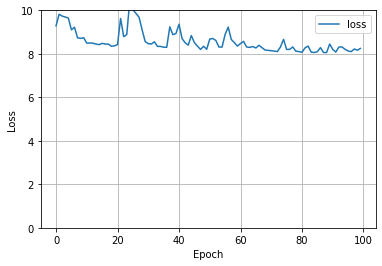

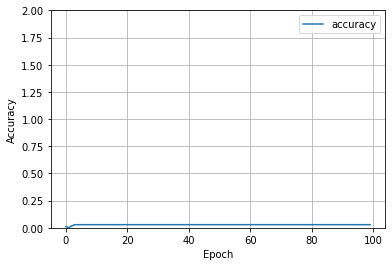

In [ ]:
def plot_loss(model):
  plt.figure(1)
  plt.plot(model.history['loss'], label='loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

  plt.figure(2)
  plt.plot(model.history['accuracy'], label='accuracy')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)

## **produce text**

In [ ]:
# vytvorenie random sekvencie slov podľa indexov
# alternativne môže byť použitá lubovoľná veta na zahájenie prediktívneho písania

import random

keys_all = list(word_index.keys()) 
vals = list(word_index.values())

random_indexes = random.sample(range(0, vocab_size-1), 5)

random_vocab = []
for ind in random_indexes:
  word = keys_all[vals.index(ind)]
  random_vocab.append(word)

random_txt = ' '.join(random_vocab)
print(random_txt)

testovanie udržateľného smyslu mobilní silverman


In [ ]:
initial_text = random_txt
follow_up = 100


for _ in range(follow_up):
  token_list = tokenizer.texts_to_sequences([initial_text])[0]
  token_list = pad_sequences([token_list], maxlen=embedding_dim-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in word_index.items():
	  if index == predicted:
	   output_word = word
	   break
  initial_text += " " + output_word

print(initial_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
testovanie udržateľného smyslu mobilní silverman a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a


Generovaný text: chápali vyčerpávali stovke útočníkov odísť etapovite virológmi svojho hormóny vyčistili 0 napr hlavicami ponárajú úmrtia poslancům volali ponárajú úmrtia zámkom záujme nemá klimatologie terorizmus tanegašima štiepenia tzv štiepenia tzv prekvapením terorizmus súvislosti manipulovateľná zapadá špičky impérium tanegašima terorizmus ústav čs myšlienky bojujú predstaviteľov geus expert guardian riziká placeba boja nažive terorizmus tieňov myšlienky terorizmus predstaviteľov škole boja boja masmédiá prostředí chudáci chudáci film nemu prekvapenie terorizmus tanegašima vynořujeme 2001 radov konfliktu čase veršov zničené vyskytujúci rozumieť terorizmus ústav tieňov minima 2001 veršov myšlienky západ obetí báli tieňov myšlienky podporu neznáme 2001 veršov myšlienky zlomilo guardian podporu príspevkov světa terapia hlavicami obrovská zlomilo nemorálne poľska minima


## **Final Text**

In [ ]:
initial_text = "nový vírus"
follow_up = 100


for _ in range(follow_up):
  token_list = tokenizer.texts_to_sequences([initial_text])[0]
  token_list = pad_sequences([token_list], maxlen=embedding_dim-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in word_index.items():
	  if index == predicted:
	   output_word = word
	   break
  initial_text += " " + output_word

print(initial_text)

nový vírus a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a


generovaný text: nový vírus krátka myslenie vynálezov chrípkou 15 '2 nás nenachádza úmrtnosť zemeguli stravy jadžima pandémie vírusu ufo domnienka mraveniskom dali kariére nezhoršily kammler nezhoršily súdu superbohatým úmrtnosť úmrtnosť úmrtnosť dolárov stravy trhu úniku nezhoršily nás fotky ussurijsk nevedomosť ochorenie 2020 objekty problém rovnosťou švejka nás fotky švejka nás fotky švejka chrípkou úmrtnosť zemeguli stravy jadžima paperclip reakcie nezhoršily chrípkou bojovníci nezhoršily ruku ládin utajit boha budúcoročnej nezhoršily chrípkou úmrtnosť lakota stravy snít snít nás 2029 úmrtnosť zemeguli stravy dôvodov scotta antény 2020 pheic nemecku scénu imunity taliansku nezhoršily kammler bojovníci superbohatým nevznikla superbohatým nevznikla kammler slobodu fotky snít kammler reakcie států antény